# 01 KIVA - DATA MINING & CLEANING

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None) #to see all columns

## LOAD DATA

In [4]:
df = pd.read_csv('kiva_loans.csv')
df_mpi = pd.read_csv('kiva_mpi_region_locations.csv')
df_lt = pd.read_csv('loan_theme_ids.csv') #no region given, maybe connect with partner id
df_ltbyreg = pd.read_csv('loan_themes_by_region.csv')

#### RENAME COLUMNS FOR CONSISTENCY

In [5]:
df_ltbyreg.columns = df_ltbyreg.columns.str.lower().str.replace(' ', '_')
df_ltbyreg.columns

Index(['partner_id', 'field_partner_name', 'sector', 'loan_theme_id',
       'loan_theme_type', 'country', 'forkiva', 'region', 'geocode_old', 'iso',
       'number', 'amount', 'locationname', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [6]:
df_mpi.columns = df_mpi.columns.str.lower()
df_mpi.columns

Index(['locationname', 'iso', 'country', 'region', 'world_region', 'mpi',
       'geo', 'lat', 'lon'],
      dtype='object')

#### SELECT EAST AFRICAN COUNTRIES

* TZ = Tanzania
* KE = Kenya
* UG = Uganda
* RW = Rwanda

In [7]:
####Loan Dataset:
EAC = df[(df.country_code=='TZ') | (df.country_code=='KE')| (df.country_code=='UG')| (df.country_code=='RW')]
EAC.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01


In [8]:
####Region/Geocode Dataset:
EAC_reg = df_ltbyreg[(df_ltbyreg.iso=='TZA') | (df_ltbyreg.iso=='KEN')| (df_ltbyreg.iso=='UGA')| (df_ltbyreg.iso=='RWA')]
EAC_reg.head(1)

,partner_id,field_partner_name,sector,loan_theme_id,loan_theme_type,country,forkiva,region,geocode_old,iso,number,amount,locationname,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
1270,65,BRAC Uganda,General Financial Inclusion,a1050000000wezZ,General,Uganda,No,Abaita Ababiri,NaN,UGA,1,1125,"Abaita Ababiri, Uganda","[(0.09353349999999999, 32.4990828)]",Abayita Ababiri; Lyamutundwe; Wakiso; Central ...,"(0.09353349999999999, 32.4990828)",0.093534,32.499083,"West Nile, Uganda","(0.3157239, 32.575568)",70.0


In [9]:
EAC_reg.field_partner_name.value_counts()

VisionFund Kenya                                                      157
SMEP Microfinance Bank                                                115
UGAFODE Microfinance                                                  103
Kenya ECLOF                                                           101
Juhudi Kilimo                                                          90
BRAC Uganda                                                            77
Impact Carbon                                                          64
Urwego Opportunity Bank                                                48
HOFOKAM                                                                38
Yehu Microfinance Trust                                                27
Junior Achievement Kenya                                               22
VisionFund Rwanda                                                      20
Burn Manufacturing                                                     19
Jibu                                  

In [10]:
####MPI (Target variable)
EAC_mpi = df_mpi[(df_mpi.iso=='TZA') | (df_mpi.iso=='KEN')| (df_mpi.iso=='UGA')| (df_mpi.iso=='RWA')]
EAC_mpi.head()

,locationname,iso,country,region,world_region,mpi,geo,lat,lon
450,"Central, Kenya",KEN,Kenya,Central,Sub-Saharan Africa,0.075,"(-4.0627412, 39.6771481)",-4.062741,39.677148
451,"Coast, Kenya",KEN,Kenya,Coast,Sub-Saharan Africa,0.242,"(-3.2096898, 40.1169399)",-3.209690,40.116940
452,"Eastern, Kenya",KEN,Kenya,Eastern,Sub-Saharan Africa,0.190,"(0.7137256, 35.517938)",0.713726,35.517938
453,"Nairobi, Kenya",KEN,Kenya,Nairobi,Sub-Saharan Africa,0.020,"(-1.2920659, 36.8219462)",-1.292066,36.821946
454,"North Eastern, Kenya",KEN,Kenya,North Eastern,Sub-Saharan Africa,0.509,"(-0.0190061, 37.6480812)",-0.019006,37.648081


#### Check for missing values in the loan dataset

tags                  31205
region                15228
funded_time            8654
partner_id             8372
use                    1066
borrower_genders       1064
disbursed_time          381
date                      0
country_code              0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
currency                  0
country                   0
repayment_interval        0
posted_time               0
term_in_months            0
lender_count              0
id                        0
dtype: int64


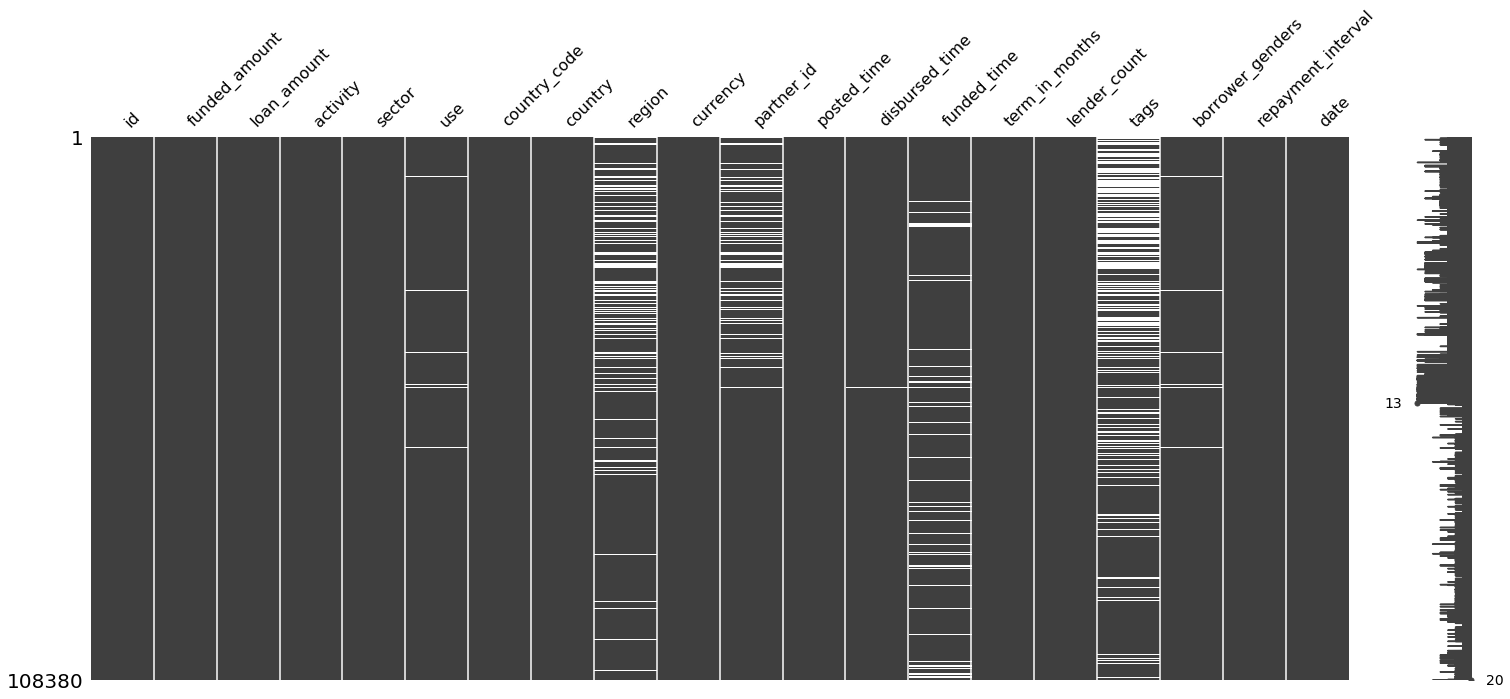

In [11]:
import missingno
# visualize all missings in plot
missingno.matrix(EAC)

# give out missings as list
missing_data = EAC.isnull().sum().sort_values(ascending=False)
print(missing_data)

In [12]:
######Region has a lot of missing values -> 1st approach: delete all of them
EAC_dropna = EAC.copy()
EAC_dropna.dropna(subset = ['region'], inplace=True)
EAC_dropna.shape

(93152, 20)

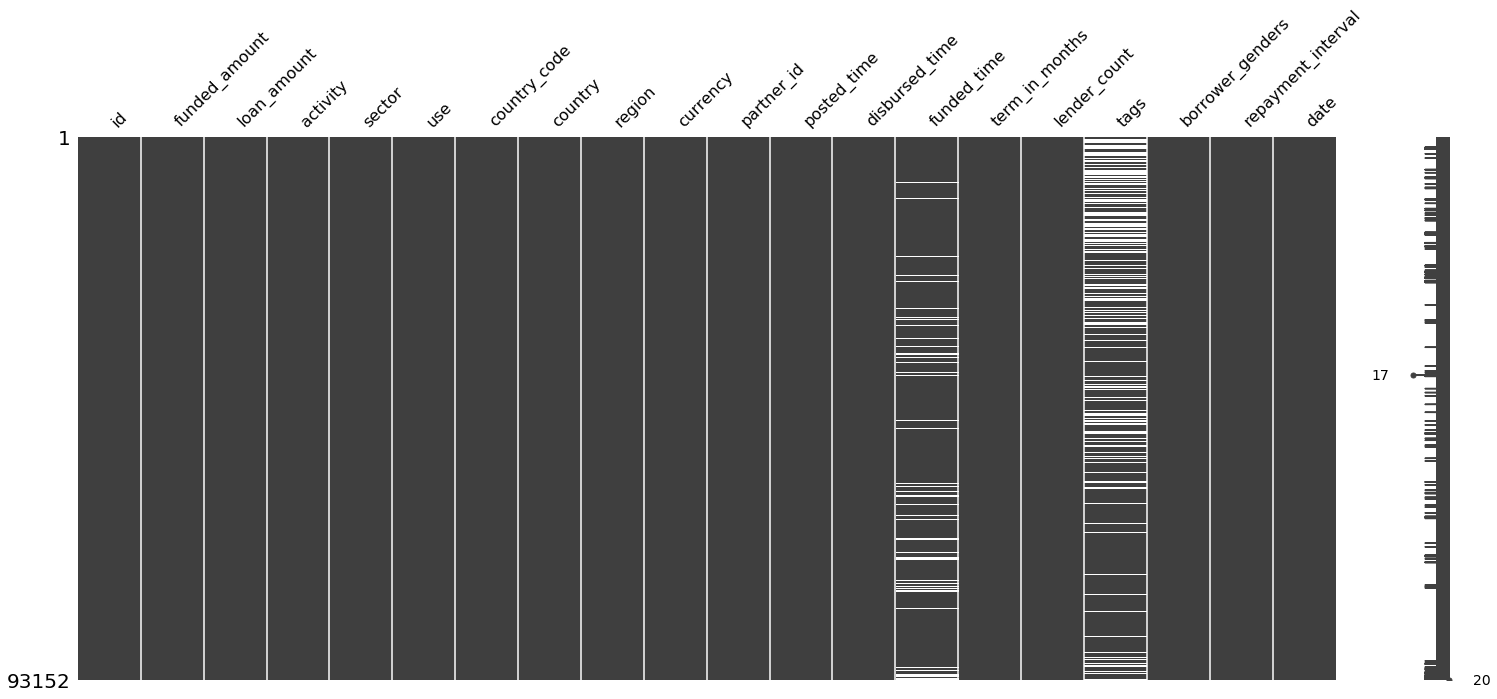

In [13]:
###Check of the dropping process:
missingno.matrix(EAC_dropna)
missing_data = EAC_dropna.isnull().sum().sort_values(ascending=False)

In [14]:
####MERGING PROCESS####

In [15]:
EAC_reg_drop = EAC_reg.drop_duplicates('region')
EAC_reg_drop.region.value_counts()

Nanyuki                    1
Kibwezi                    1
Koyango Manyatta-kisumu    1
Kalile ;Tala               1
Weema                      1
Byumba                     1
Maua                       1
Nyandarua South            1
Siongiroi                  1
NGENDA                     1
Kasangati                  1
Bushenyi                   1
Furunzi;Malindi            1
Nyeri                      1
Kakamega                   1
Kapsabet                   1
Rufiji                     1
Mikinduri                  1
Kwa Reuben, Nairobi.       1
Ndejje                     1
Kisekende                  1
Mwamlai Mombasa            1
Njeru                      1
Kyela                      1
Mbarara                    1
Lelan                      1
Lunga Lunga                1
Kondele                    1
Kyotera                    1
Amuria                     1
                          ..
Jinja                      1
Masaka                     1
Kisumu                     1
Lamu          

geocode_old           729
rural_pct             262
lon                    28
lat                    28
names                  28
geocode                28
mpi_geo                28
forkiva                 0
field_partner_name      0
sector                  0
loan_theme_id           0
loan_theme_type         0
country                 0
number                  0
region                  0
iso                     0
amount                  0
locationname            0
geo                     0
mpi_region              0
partner_id              0
dtype: int64


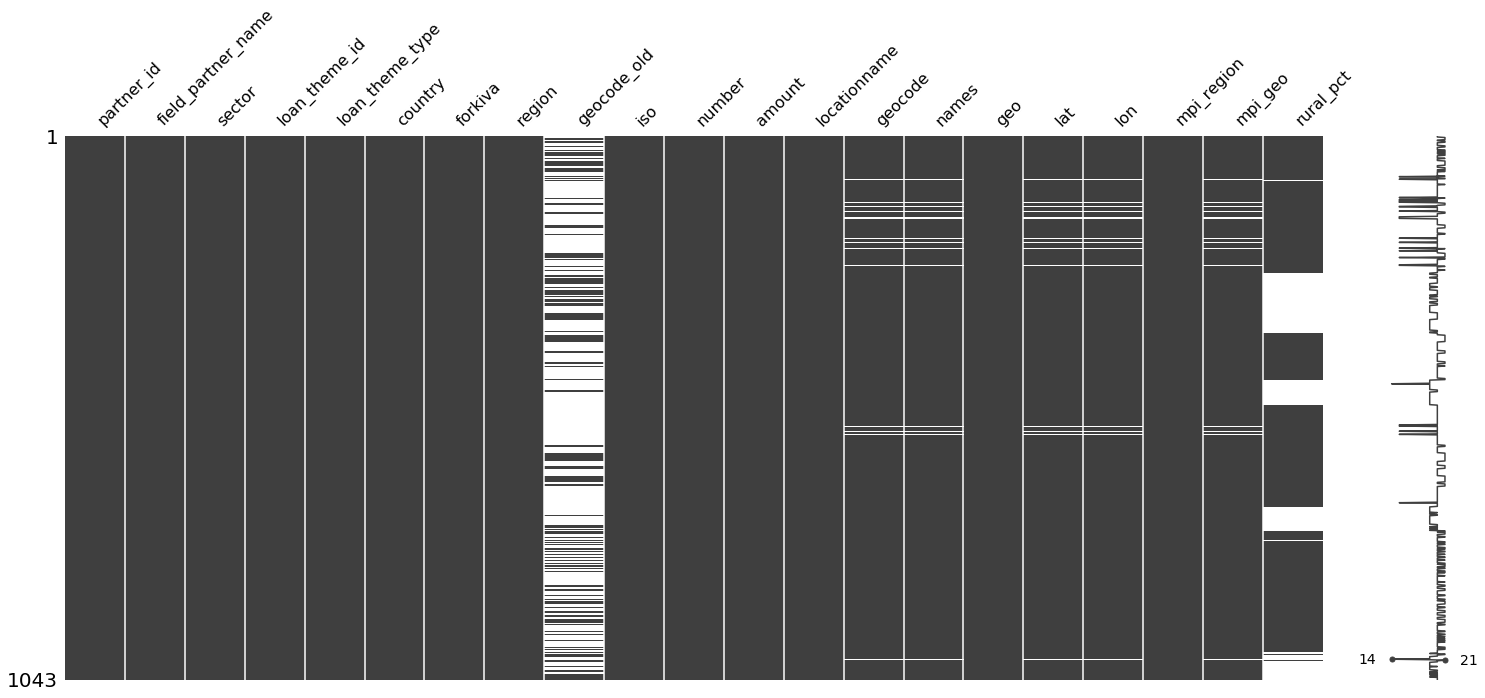

In [16]:
###Check for missing values in the region/geocode dataset:
missingno.matrix(EAC_reg)
missing_data = EAC_reg.isnull().sum().sort_values(ascending=False)
print(missing_data)

Missing values in the region/geocode dataframe:
 * it looks like several regions are missing the mpi_geocode -> further investigation

In [17]:
####MERGING PROCESS####
#First: Add geocode (regional level) to the individual borrowers
#merging 2 dataframes together by region to get the geodata on the core dataset:
#this will produce duplicates which have to be deleted after the merging is done

EAC_core = pd.merge(EAC_dropna, 
                EAC_reg_drop[['region','geo', 'lat', 'lon', 'mpi_geo']],
                on='region',
                how='left',
                validate='m:1',
               )#.drop_duplicates() #dropping the duplicates
EAC_core.shape

(93152, 24)

In [18]:
###2nd part: Add mpi according to the corresponding geocode for mpi
EAC_core_mpi = pd.merge(EAC_core, 
                EAC_mpi[['geo', 'mpi']],
                how='left',
                left_on='mpi_geo',
                right_on='geo',
                validate='m:1' #many to one: check if in the right dataset keys are unique
               ).drop_duplicates() #dropping the duplicates
EAC_core_mpi.shape

(93152, 26)

### MPI and regions

In [19]:
EAC_core_mpi.mpi_geo.value_counts()

(-0.115003, 34.851379)              23046
(0.7137256, 35.517938)              11978
(0.2580521, 30.5279096)             11280
(-4.0627412, 39.6771481)            10241
(-1.2849963, 36.8272273)             9411
(-0.0190061, 37.6480812)             7101
(-6.135729500000001, 39.3621196)     4045
(0.3475964, 32.5825197)              2534
(1.373333, 32.290275)                2363
(-1.2920659, 36.8219462)             2022
(-3.2096898, 40.1169399)             1129
(0.2540775, 31.99280779999999)       1074
(0.3157239, 32.575568)               1058
(0.3729261, 32.6357573)               889
(1.2692186, 33.438353)                635
(-1.9705786, 30.1044288)              430
(0.3215308, 32.5862002)               426
(-6.369028, 34.888822)                380
(2.8780034, 32.7181375)               139
(-1.940278, 29.873888)                139
(-2.07649, 29.3250347)                 13
(-1.5009963, 29.6384954)               12
(2.8308738, 34.1531947)                 1
Name: mpi_geo, dtype: int64

**Caution:** MPI is only available for 23 regions across the east-african countries under investigation. 

**-----------------------------------------------------------------------------------**

tags                  21029
funded_time            7836
mpi                    2806
mpi_geo                2806
lon                    2806
lat                    2806
geo_y                  2806
geo_x                  2554
use                       1
region                    0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country_code              0
country                   0
disbursed_time            0
currency                  0
partner_id                0
posted_time               0
term_in_months            0
lender_count              0
borrower_genders          0
repayment_interval        0
date                      0
id                        0
dtype: int64

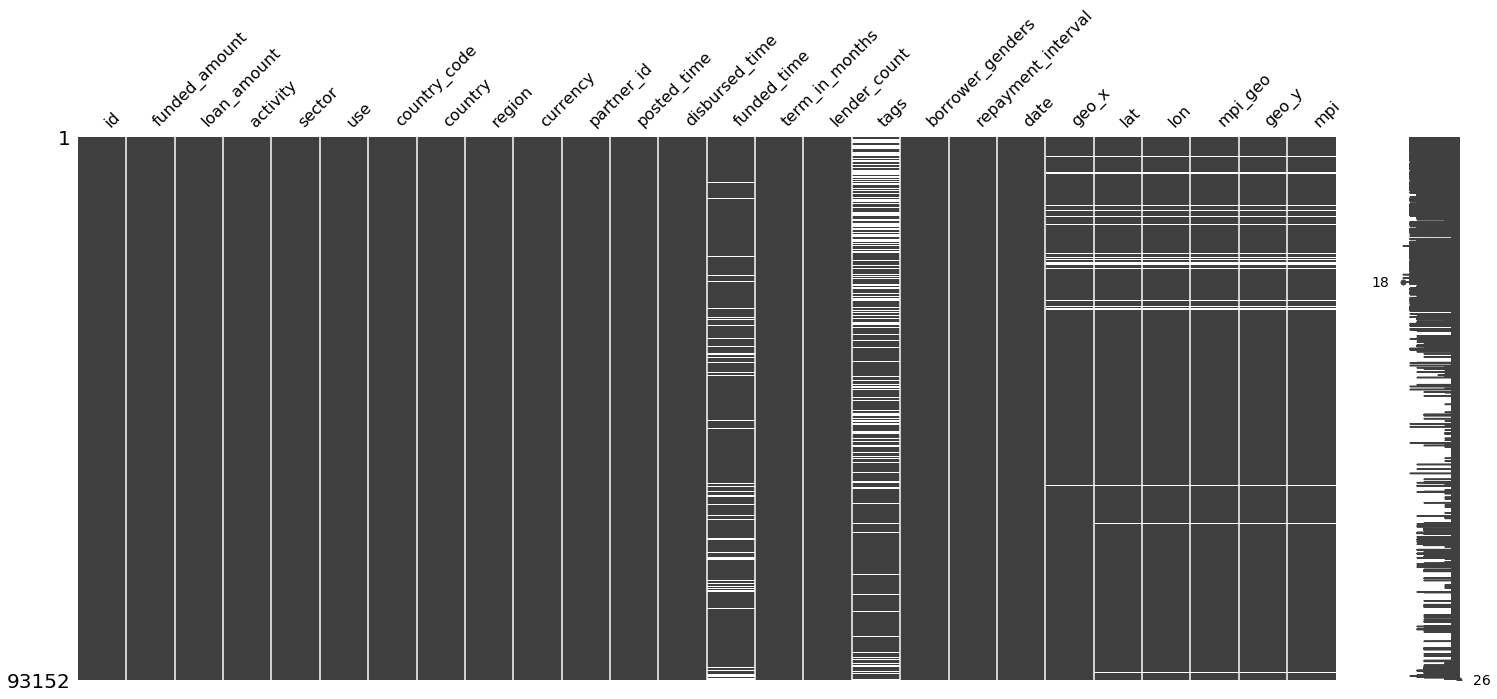

In [20]:
missingno.matrix(EAC_core_mpi)
missing_values=EAC_core_mpi.isnull().sum().sort_values(ascending=False) 
missing_values

Missing values regarding the target variable MPI:
   * overall: 2806
   * as a percentage of the whole dataset: 3%
   * deleting seems to be a good option

In [21]:
EAC_core_mpi.dropna(subset = ['mpi'], inplace=True)

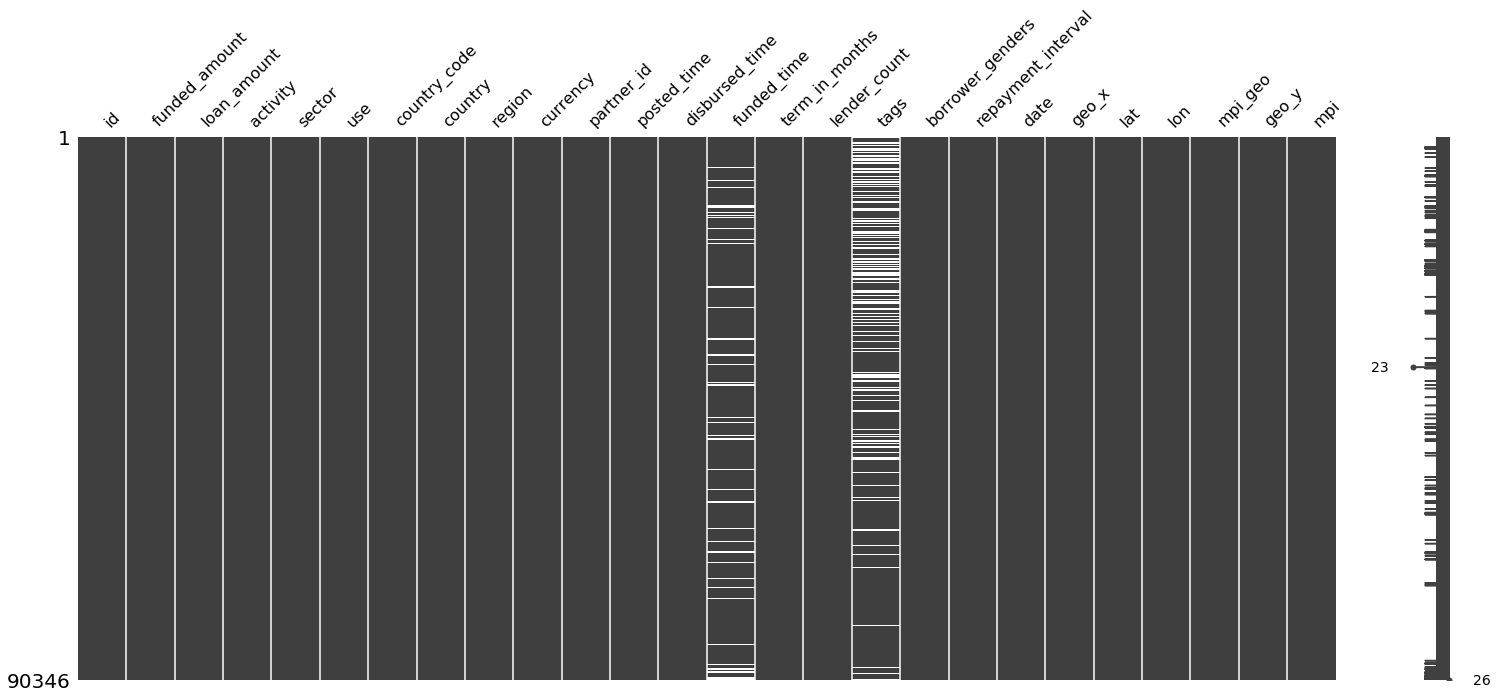

In [22]:
#### Check the deleting process:
missingno.matrix(EAC_core_mpi)

In [23]:
EAC_core_mpi.shape

(90346, 26)

In [24]:
EAC_core_mpi.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'geo_x', 'lat', 'lon', 'mpi_geo', 'geo_y', 'mpi'],
      dtype='object')

In [25]:
####Handling missing values -> Drop
EAC_core_mpi = EAC_core_mpi.drop(['tags', 'funded_time','use'], axis=1)
EAC_core_mpi.shape

(90346, 23)

In [26]:
EAC_core_mpi.head(1)

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi
0,653185,250.0,250.0,Fruits & Vegetables,Food,KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,13.0,7,female,irregular,2014-01-02,"(-3.3973104, 38.5559336)",-3.39731,38.555934,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075


**-----------------------------------------------------------------------------------------------------**

#### Convert funded amount and loan amount into USD

##### Load in external data and do some preprocessing

In [27]:
####First Approach
####Get the exchange rates (yearly averages) for all years which are in the dataset
####Merge them together
####Make the calculation
####load data:
###the data is in LCU per USD (yearly averages) -> for the conversion Division, not multiplication!
###for simplicity measure just take the mean over the corresponding years for each country/currency
exchange = pd.read_csv('external_data/exchange_rate.csv')
###Convert column names as usual
exchange.columns = exchange.columns.str.lower().str.replace(' ', '_')
exchange

,series_name,series_code,country_name,country_code,2014_[yr2014],2015_[yr2015],2016_[yr2016],2017_[yr2017]
0,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,Kenya,KEN,87.922500,98.179167,101.504167,103.410446
1,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,Uganda,UGA,2599.788201,3240.645420,3420.098007,3611.224458
2,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,Tanzania,TZA,1653.232013,1991.390964,2177.085954,2228.857629
3,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,Rwanda,RWA,681.861719,720.975109,787.251522,831.530787
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Last Updated: 04/09/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#drop nas and columns not needed for the calculation
exchange = exchange.dropna().drop(['series_name', 'series_code', 'country_code'], axis=1)
exchange.rename(columns={'country_name':'country','2014_[yr2014]':'2014', '2015_[yr2015]':'2015', '2016_[yr2016]':'2016','2017_[yr2017]':'2017'}, inplace=True)
exchange

,country,2014,2015,2016,2017
0,Kenya,87.922500,98.179167,101.504167,103.410446
1,Uganda,2599.788201,3240.645420,3420.098007,3611.224458
2,Tanzania,1653.232013,1991.390964,2177.085954,2228.857629
3,Rwanda,681.861719,720.975109,787.251522,831.530787


In [29]:
#rearrange the dataset in order to get the merge done:
exchange = exchange.melt(id_vars=["country"], 
        var_name="year", 
        value_name="exrate")
exchange

,country,year,exrate
0,Kenya,2014,87.922500
1,Uganda,2014,2599.788201
2,Tanzania,2014,1653.232013
3,Rwanda,2014,681.861719
4,Kenya,2015,98.179167
5,Uganda,2015,3240.645420
6,Tanzania,2015,1991.390964
7,Rwanda,2015,720.975109
8,Kenya,2016,101.504167
9,Uganda,2016,3420.098007


##### Preprocess EAC_core_mpi dataset in order to merge and merge the datasets together

In [30]:
##Extract the year from the data feature and create a new column in order to merge:
EAC_core_mpi['year'] = pd.DatetimeIndex(EAC_core_mpi['date']).year
EAC_core_mpi.head(1)

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi,year
0,653185,250.0,250.0,Fruits & Vegetables,Food,KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,13.0,7,female,irregular,2014-01-02,"(-3.3973104, 38.5559336)",-3.39731,38.555934,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014


In [31]:
EAC_core_mpi.shape

(90346, 24)

In [32]:
###Merge the dataframes:
###change year column to numeric in order to make the merge work:
exchange.year = pd.to_numeric(exchange.year)
EAC_core_mpi = pd.merge(EAC_core_mpi, 
                exchange[['country', 'year','exrate']],
                how='left',
                on=['year', 'country'],
                validate='m:1' #many to one: check if in the right dataset keys are unique
               )
EAC_core_mpi.shape

(90346, 25)

In [33]:
EAC_core_mpi.head(1)

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi,year,exrate
0,653185,250.0,250.0,Fruits & Vegetables,Food,KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,13.0,7,female,irregular,2014-01-02,"(-3.3973104, 38.5559336)",-3.39731,38.555934,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.9225


#### Calculate the funded amount and loan amount in USD:

In [34]:
EAC_core_mpi['funded_amount_usd'] = EAC_core_mpi['funded_amount'] / EAC_core_mpi['exrate']
EAC_core_mpi['loan_amount_usd'] = EAC_core_mpi['loan_amount'] / EAC_core_mpi['exrate']
EAC_core_mpi.head(3)

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi,year,exrate,funded_amount_usd,loan_amount_usd
0,653185,250.0,250.0,Fruits & Vegetables,Food,KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,13.0,7,female,irregular,2014-01-02,"(-3.3973104, 38.5559336)",-3.397310,38.555934,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.922500,2.843413,2.843413
1,653170,3175.0,3175.0,Butcher Shop,Food,TZ,Tanzania,Dar es Salaam,TZS,87.0,2014-01-02 06:26:40+00:00,2013-12-26 08:00:00+00:00,10.0,93,"male, male, male, male, male",monthly,2014-01-02,"(-6.792354, 39.2083284)",-6.792354,39.208328,"(-6.135729500000001, 39.3621196)","(-6.135729500000001, 39.3621196)",0.143,2014,1653.232013,1.920481,1.920481
2,653237,250.0,250.0,Cosmetics Sales,Retail,KE,Kenya,Likoni,KES,164.0,2014-01-02 08:58:55+00:00,2013-12-09 08:00:00+00:00,14.0,3,female,irregular,2014-01-02,"(-4.0929017, 39.6614446)",-4.092902,39.661445,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.922500,2.843413,2.843413


#### Extracting information from the gender variable:

In [35]:
####Creating a new column for gender, first approach: If there is more than one entry-> label it as a group!

gender=[]

for row in EAC_core_mpi['borrower_genders']: 
    if row =='female':
        gender.append('female')
    elif row=='male':
        gender.append('male')
    else: 
        gender.append('group')
        
EAC_core_mpi['gender'] = gender

In [36]:
EAC_core_mpi.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi,year,exrate,funded_amount_usd,loan_amount_usd,gender
0,653185,250.0,250.0,Fruits & Vegetables,Food,KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,13.0,7,female,irregular,2014-01-02,"(-3.3973104, 38.5559336)",-3.397310,38.555934,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.922500,2.843413,2.843413,female
1,653170,3175.0,3175.0,Butcher Shop,Food,TZ,Tanzania,Dar es Salaam,TZS,87.0,2014-01-02 06:26:40+00:00,2013-12-26 08:00:00+00:00,10.0,93,"male, male, male, male, male",monthly,2014-01-02,"(-6.792354, 39.2083284)",-6.792354,39.208328,"(-6.135729500000001, 39.3621196)","(-6.135729500000001, 39.3621196)",0.143,2014,1653.232013,1.920481,1.920481,group
2,653237,250.0,250.0,Cosmetics Sales,Retail,KE,Kenya,Likoni,KES,164.0,2014-01-02 08:58:55+00:00,2013-12-09 08:00:00+00:00,14.0,3,female,irregular,2014-01-02,"(-4.0929017, 39.6614446)",-4.092902,39.661445,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.922500,2.843413,2.843413,female
3,653229,250.0,250.0,Tailoring,Services,KE,Kenya,Likoni,KES,164.0,2014-01-02 08:43:29+00:00,2013-12-09 08:00:00+00:00,14.0,1,female,irregular,2014-01-02,"(-4.0929017, 39.6614446)",-4.092902,39.661445,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.922500,2.843413,2.843413,female
4,653161,3175.0,3175.0,Home Products Sales,Retail,TZ,Tanzania,Dar es Salaam,TZS,87.0,2014-01-02 06:03:54+00:00,2013-12-26 08:00:00+00:00,8.0,114,"male, female, female, female",irregular,2014-01-02,"(-6.792354, 39.2083284)",-6.792354,39.208328,"(-6.135729500000001, 39.3621196)","(-6.135729500000001, 39.3621196)",0.143,2014,1653.232013,1.920481,1.920481,group


In [37]:
EAC_core_mpi.gender.value_counts()

female    51157
male      24890
group     14299
Name: gender, dtype: int64

In [38]:
EAC_core_mpi.mpi.value_counts()

0.223    23046
0.190    11978
0.346    11280
0.075    10241
0.211     9411
0.509     7101
0.143     4045
0.076     2534
0.400     2363
0.020     2022
0.242     1129
0.371     1074
0.484     1058
0.294      889
0.417      635
0.118      430
0.332      426
0.145      380
0.292      139
0.431      139
0.266       13
0.243       12
0.634        1
Name: mpi, dtype: int64

In [39]:
#####Saving the dataframe for further work (EDA, etc.)
EAC_core_mpi.to_csv(r'data/kiva_cleaned.csv', index = False, header=True)